# Probability distributions II

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Continuous-probability-distributions" data-toc-modified-id="Continuous-probability-distributions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Continuous probability distributions</a></span><ul class="toc-item"><li><span><a href="#Uniform-distribution-on-interval-[0,-1]" data-toc-modified-id="Uniform-distribution-on-interval-[0,-1]-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Uniform distribution on interval [0, 1]</a></span></li><li><span><a href="#Uniform-distribution-on-interval-[a,-b]" data-toc-modified-id="Uniform-distribution-on-interval-[a,-b]-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Uniform distribution on interval [a, b]</a></span></li><li><span><a href="#Exponential-distribution" data-toc-modified-id="Exponential-distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exponential distribution</a></span></li><li><span><a href="#Normal-distribution" data-toc-modified-id="Normal-distribution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Normal distribution</a></span><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#scipy's-norm" data-toc-modified-id="scipy's-norm-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>scipy's <code>norm</code></a></span></li><li><span><a href="#Sampling-from-a-normal" data-toc-modified-id="Sampling-from-a-normal-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Sampling from a normal</a></span></li><li><span><a href="#Point-distribution-function-(density-function)" data-toc-modified-id="Point-distribution-function-(density-function)-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Point distribution function (density function)</a></span></li><li><span><a href="#Cumulative-distribution-function" data-toc-modified-id="Cumulative-distribution-function-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Cumulative distribution function</a></span></li><li><span><a href="#Percent-point-function" data-toc-modified-id="Percent-point-function-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>Percent point function</a></span></li></ul></li><li><span><a href="#Other-continuous-probability-distributions" data-toc-modified-id="Other-continuous-probability-distributions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Other continuous probability distributions</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Discrete probability distributions: Poisson

The Poisson distribution is used to describe _how many times something might happen in a specific timeframe_.

Examples:

- The number of meteorites greater than 1 meter diameter that strike Earth in a year
- The number of patients arriving in an emergency room between 10 and 11 pm
- The number of laser photons hitting a detector in a particular time interval

# Exercise!

You now work for Zara as a Business Intelligence area. 
You are in charge of helping the marketing department set up an event. 
They want to know how many people will go to a certain store where the event will be. If there very few people (less than 22), they won't organize it.

You know that, on average, the number of people going to that store is 15 people/day. You also know that the distribution of people going to a store follows a Poisson distribution.

## Question to answer

What's the probability of having 22 or more people in that shop?

## Parameters

$\lambda$ is the theoretical average number of ocurrences. In our case, it's 15.

$\Omega = \{0, 1, 2, 3, ...\}$


## Set up the distribution

$X \sim Po(\lambda=15)$

Do you remember the Poisson distribution?

$$P(X=k)=\frac{\lambda ^{k}e^{-\lambda }}{k!}$$

In [2]:
from scipy.stats import poisson

In [3]:
my_poisson = poisson(mu=15)

In [4]:
my_sampled_values = my_poisson.rvs(size=300)

In [5]:
max_value = my_sampled_values.max()
min_value = my_sampled_values.min()

min_value, max_value

(5, 25)

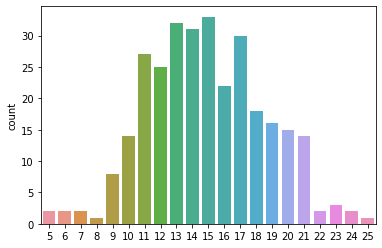

In [6]:
ax = sns.countplot(x=my_sampled_values)

What about the probability distribution of this Poisson?

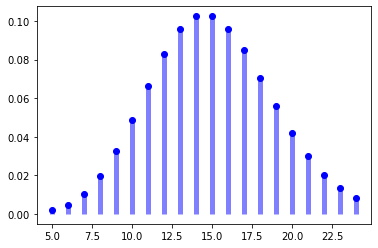

In [7]:
x = np.arange(min_value,max_value)
fig, ax = plt.subplots(1, 1)
ax.plot(x, my_poisson.pmf(x), 'bo')
ax.vlines(x, 0, my_poisson.pmf(x), colors='b', lw=5, alpha=0.5)

In [8]:
my_poisson.pmf(15)

0.1024358666645339

The `cdf` function gives the cumulative distribution function at a given value: $P(X \leq x)$.

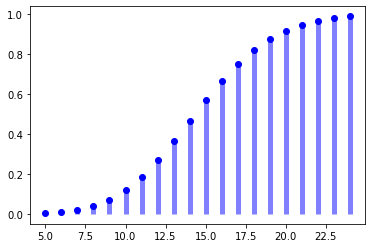

In [9]:
x = np.arange(min_value,max_value)
fig, ax = plt.subplots(1, 1)
ax.plot(x, my_poisson.cdf(x), 'bo')
ax.vlines(x, 0, my_poisson.cdf(x), colors='b', lw=5, alpha=0.5)

In [10]:
my_poisson.cdf(x=22)

0.9672557550672212

In [11]:
1 - my_poisson.cdf(x=22)

0.03274424493277883

# Continuous probability distributions

**Continuous probability** distributions are those which can take an infinite number of values

X is a continuous random variable.  
X follows a continuous probability distribution.

# Uniform distribution on interval [0, 1]

All numbers in the inteval [0, 1] are equally probable.

$X \sim U(0, 1)$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Unit-interval.svg/1200px-Unit-interval.svg.png" width=500>

$P(x \leq 0.4)=0.4$

$P(x \geq 0.7)=0.3$

$P(x \leq 1)= 1$

$P(x \geq 0)=1$

$P(0.1 \leq x \leq 0.4)=$

For all $c, d \in [0, 1]$ we have 

$$P(c < x <= d) = d-c$$

Lets use Python distribution instantiation to generate samples from a $U(0, 1)$ distribution

In [12]:
from scipy.stats import uniform

In [13]:
my_uniform = uniform(0, 1)

In [14]:
my_uniform.rvs(size=1)

array([0.82213957])

In [15]:
sample = my_uniform.rvs(size=10)
sample

# Exercise!

With the uniform distribution you have created:
1. sample 100 values and store them in a variable,
2. plot a histogram with them.

3. Do the same but with 10.000 values!

In [30]:
sample = my_uniform.rvs(size=100)

<AxesSubplot:ylabel='Count'>

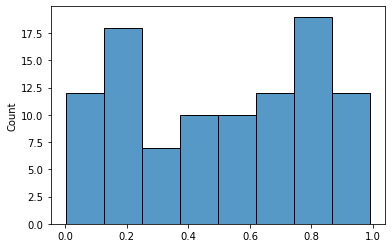

In [31]:
sns.histplot(sample)

In [20]:
sample = my_uniform.rvs(size=1000)

<AxesSubplot:ylabel='Count'>

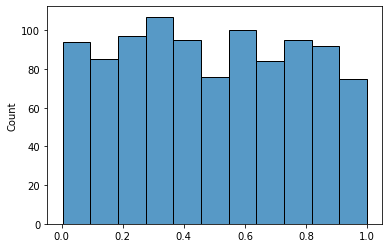

In [21]:
sns.histplot(sample)

# Exercise!
For a Uniform(0,1), the mean value is 0.5. Can you check it?

In [22]:
sample.mean()

0.4905419442351252

In [23]:
my_uniform.mean()

0.5

`.cdf` is the cumulative distribution function  
`.cdf(x)` tells us the probability of $X<x$

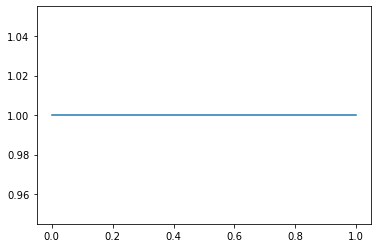

In [33]:
x = np.linspace(0, 1, 100)
y = my_uniform.pdf(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

# Exercise!

Following a similar approach as before, plot the _cummulative density function_ for your uniform distribution.

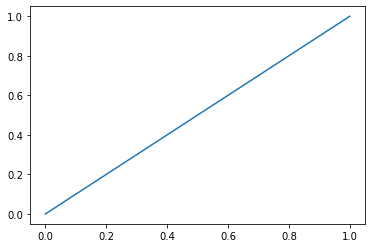

In [34]:
x = np.linspace(0, 1, 100)
y = my_uniform.cdf(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

# Exercise!

What is the probability of sampling a value less than 0.7?

In [38]:
my_uniform.cdf(0.7)

0.5

# Uniform distribution on interval [a, b]

All numbers in the inteval [a, b] are equally probable.

Examples of real-life events following a Uniform distribution:

- Position of a particular air molecule in a room
- Point on a car tyre where the next puncture will occur
- Time that one may have to wait for a train
- In oil exploration, the position of the oil-water contact in a potential prospect

Do lottery numbers follow a uniform distribution?

$X \sim U(a, b)$

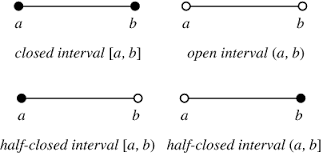

$P(x \leq b)=1$

$P(x \geq a)=1$

$\frac{a+b}{2}$ is the mean between $a$ and $b$

$P(x \leq \frac{a+b}{2})=0.5$

Lets use Python distribution instantiation to generate samples from a $U(a, b)$ distribution

In [40]:
from scipy.stats import uniform

In [42]:
a, b = 4, 10

In [43]:
# h is the interval length
h = b - a
h

6

`uniform` receives `a` and `h`

In [44]:
my_uniform = uniform(loc=a, scale=h)

# Exercise!

To create a (continuous) uniform distribution between 11 and 23, complete these steps:

0. Create vars `a`, `b` and `h` and create the uniform distribution.
1. Sample 10.000 values and store them in a variable
2. Using Seaborn, plot a histogram with those values
3. Plot the _probability density function_
4. Plot the _cumulative density function_
5. What are the means of your sample and your distribution?

In [35]:
a = 11
b = 23
h = b - a

In [36]:
my_uniform = uniform(loc=a, scale=h)

In [40]:
sample = my_uniform.rvs(10_000)

<AxesSubplot:ylabel='Count'>

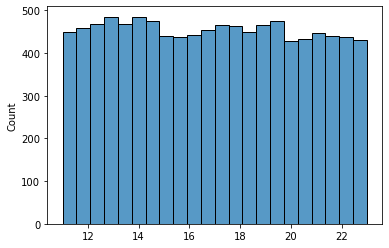

In [41]:
sns.histplot(sample)

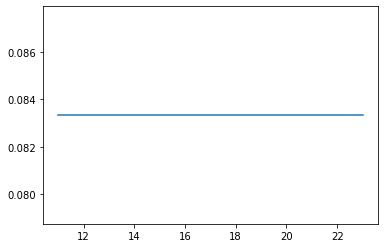

In [42]:
x = np.linspace(a, b, 100)
y = my_uniform.pdf(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

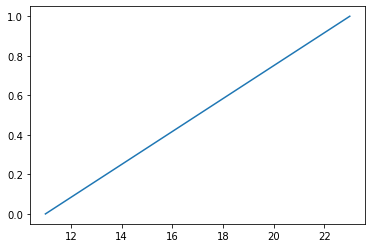

In [43]:
x = np.linspace(a, b, 100)
y = my_uniform.cdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

In [44]:
sample.mean()

16.927501748093775

In [45]:
my_uniform.mean()

17.0

In [47]:
my_uniform

# Exponential distribution

Models the time it takes for a random event (with a constant rate) to occur:
 * Next person in a queue to appear
 * Call at call center to happen
 * Radioactive particles to decay
 * DNA item to mutate on.

"The average time for a new patient to appear from 8pm to 9pm is 5 minutes"  
"The average time for a new patient to appear from 8pm to 9pm follows an Exponential distribution with mean $5$"

The exponential is the reciprocal distribution of the Poisson distribution: the exponential distribution models the time between events, while the Poisson is used to represent the number of events within a unit of time.

In [59]:
from scipy.stats import expon

The exponential, like the Poisson, is a $1$-parameter distribution function

$X \sim Exp(\mu)$

This parameter is the mean, called `mu`, $\mu$

`scipy` calls it `scale`

Lets model patients who arrive on average every $5$ minutes

In [60]:
my_e = expon(scale=5)

In [61]:
my_e.mean()

5.0

`.rvs` generates a sample drawn from the distribution

In [89]:
sample = my_e.rvs(size=1000)

In [ ]:
sample.max()

<AxesSubplot:ylabel='Count'>

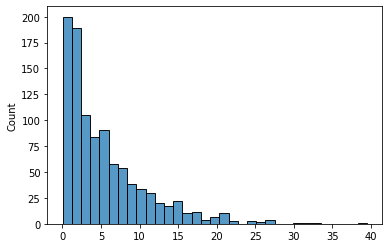

In [90]:
sns.histplot(sample)

`.pdf` is the point distribution function 

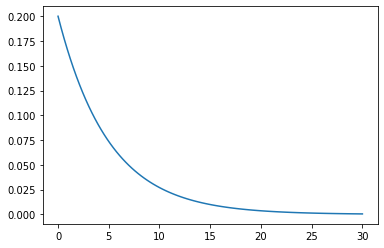

In [92]:
x = np.linspace(0, 30, 100)
y = my_e.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

`.cdf` is the cumulative distribution function  
`.cdf(x)` tells us the probability of $X<x$

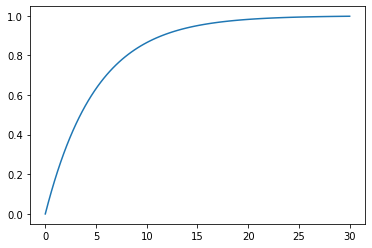

In [97]:
x = np.linspace(0, 30, 100)
y = my_e.cdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

In [93]:
my_e.cdf(1)

0.18126924692201815

In [94]:
my_e.cdf(5)

0.6321205588285577

In [95]:
my_e.cdf(10)

0.8646647167633873

In [96]:
my_e.cdf(20)

0.9816843611112658

In [99]:
my_uniform.mean()

7.0

### Normal distribution

Normal distributions are important in statistics and are often used in the natural and social sciences 

The normal distribution is the most important probability distribution in statistics, because it fits many natural and social phenomena :
 * heights
 * blood pressure
 * IQ scores
 

It is also known as the Gaussian distribution or the bell curve

#### scipy's `norm`

In [53]:
from scipy.stats import norm

The normal, unilike the exponential, is a $2$-parameter distribution function

$X \sim N(\mu, \sigma)$

These parameters are:
 * the mean, called $\mu$
 * the standard deviation, $\sigma$

`scipy` calls them `loc` and `scale`

Lets model Spain's height population:
 * a mean of $?$
 * a std of $?$

In [54]:
my_normal = norm(loc=170, scale=10)

In [55]:
my_normal.mean()

170.0

In [56]:
my_normal.std()

10.0

# Exercise!

Sample 1.000 people from your spanish distribution and plot them.

In [57]:
sample = my_normal.rvs(size=1000)

<AxesSubplot:ylabel='Count'>

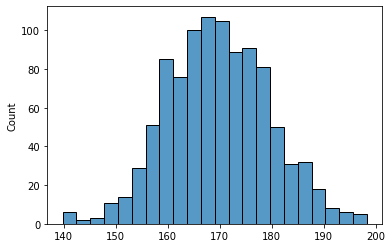

In [58]:
sns.histplot(sample)

#### Probability density function

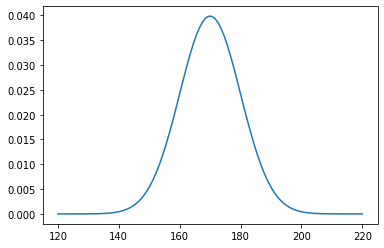

In [130]:
x = np.linspace(120, 220, 100)
y = my_normal.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

#### Cumulative distribution function

`.cdf` is the cumulative distribution function  
`.cdf(x)` tells us the probability of $X<x$

In [131]:
my_normal.cdf(140)

0.0013498980316300933

In [133]:
my_normal.cdf(170)

0.5

In [132]:
my_normal.cdf(160)

0.15865525393145707

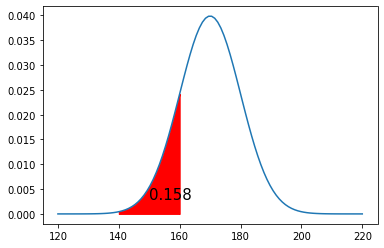

In [136]:
x = np.linspace(120, 220, 100)
y = my_normal.pdf(x)
fig, ax = plt.subplots(1, 1)
fill_x = np.linspace(140, 160, 100)
plt.fill_between(fill_x, my_normal.pdf(fill_x),color='r')
plt.text(150, 0.003, "0.158", size=15)
ax.plot(x,y)

In [137]:
my_normal.cdf(200)

0.9986501019683699

What is the proportion of people in the interval ($\mu - \sigma, \mu + \sigma)$?

In [139]:
my_normal.cdf(170 + 10) - my_normal.cdf(170 - 10)

0.6826894921370859

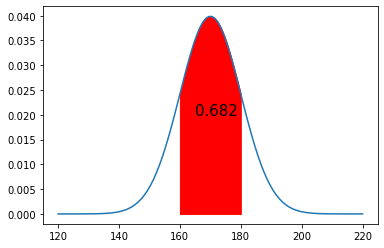

In [59]:
x = np.linspace(120, 220, 100)
y = my_normal.pdf(x)
fig, ax = plt.subplots(1, 1)
fill_x = np.linspace(160, 180, 100)
plt.fill_between(fill_x, my_normal.pdf(fill_x), color='r')
plt.text(165, 0.02, "0.682", size=15)
ax.plot(x,y)

# Exercises!

What is the proportion of people in the interval ($\mu - 2\sigma, \mu + 2\sigma)$?

What is the proportion of people in the interval ($\mu - 3\sigma, \mu + 3\sigma)$?

<img src="https://miro.medium.com/max/700/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

# Percent probability function

Is the _inverse_ of the Cumulative Distribution function

What height is such that 80% of people are lower than it?

In [140]:
my_normal.ppf(0.80)

178.41621233572914

# Exercise!

Can we visualize that value in the probability density function curve (`pdf`)?

Steps:
1. Create variables `x` and `y` to store the `linspace` and the `pdf` function
2. Create a figure with one axis with `plt.subplots()`
3. Create a linspace of the values you want to fill between 120 and 178
4. Use `plt.fill_between` to color that area.
5. Optional: Place a text in the colored area.

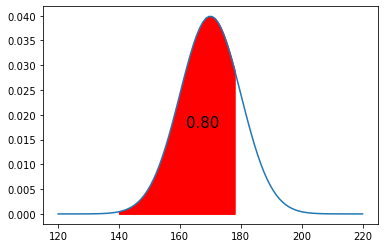

In [63]:
x = np.linspace(120, 220, 100)
y = my_normal.pdf(x)

fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

fill_x = np.linspace(120, 178, 100)
plt.fill_between(fill_x, my_normal.pdf(fill_x), color='r')

plt.text(162, 0.0175, "0.80", size=15)

### Other continuous probability distributions

 * Student's $t$ distribution (Student is a person)
 * Snedecor's $F$ distribution
 * Chi squared distribution

## Summary

 * Random variables model random experiments
 * We only need a sample space and probabilities to define a random experiment

 * Discrete random variables only have a finite (or countable) number of outcomes
 * Continuous random variables take an infinite number of outcomes

 * `.rvs` returns a sample
 * `.pmf` returns the probability mass function (for discrete distributions)
 * `.pdf` returns the probability distribution function (for continuous distributions)
 * `.cdf` returns the cumulative mass/distribution function (for both discrete and continuous distributions)
 * `.ppf` return inverse cumulative distribution function (for continuous distribution)